In [31]:
import tensorflow as tf 
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [32]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

X_train.shape

(50000, 32, 32, 3)

In [33]:
X_test.shape

(10000, 32, 32, 3)

In [34]:
X_train[0]

# this is the 3 dimensional array - the 32, 32

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [35]:
# just going to see what this looks like

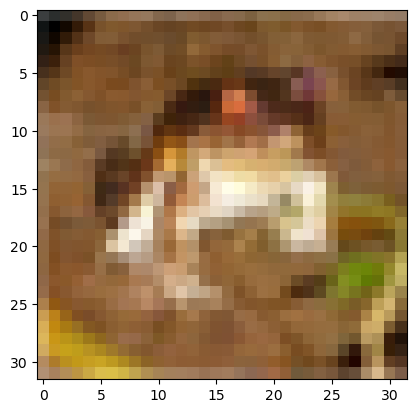

In [36]:
plt.imshow(X_train[0])

# can see the different images by changing the number

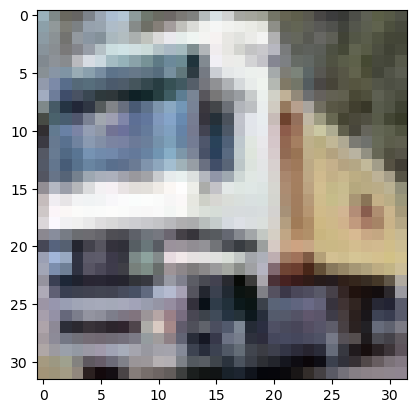

In [37]:
plt.imshow(X_train[1])

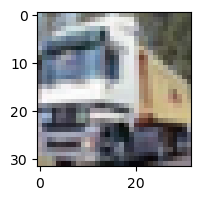

In [38]:
plt.figure(figsize = (15,2))
plt.imshow(X_train[1])

In [39]:
# for conveniance going to write a function: 

# def plot_sample(X, y, index):
#    plt.figure(figsize = (15,2))
#    plt.imshow(X[index])
#    plt.xlabel()

# but first we are going to define the list variables

In [40]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [41]:
# sooo can sick classes in the xlabel

# def plot_sample(X, y, index):
#    plt.figure(figsize = (15,2))
#    plt.imshow(X[index])
#    plt.xlabel(classes[])

In [42]:
# but we actually need to consider the Y

In [43]:
y_train.shape

(50000, 1)

In [44]:
# so this is 50000 samples and an array

# so lets check the first 5 samples

In [45]:
# this is actually showing a 2 dimensional array 

y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [46]:
# so these numbers correspond to the images labels

# ie 6 is a frog 
# 9 is a truck etc 

In [47]:
# we actually don't need a 2 dimensional array, so we are going to reshape this into a 1 dimensional array, ie a list

In [48]:
# the -1 here is NOT changing the shape of the 50000 in the y_train 
# leaving a bland after the second commar, just flattens that array 

y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [49]:
# now it is a 1 dimensional array = a list 

In [50]:
classes[9]

'truck'

In [51]:
# now we can use the index of classes to help us identify what the image is

def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

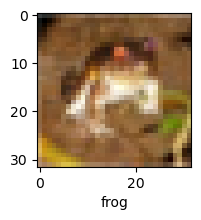

In [52]:
plot_sample(X_train, y_train, 0)

In [53]:
# now when we print the image, it gives us the label

# remember the images are in the X_train and the labels are in the y_train 

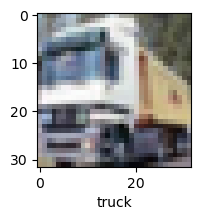

In [54]:
plot_sample(X_train, y_train, 1)

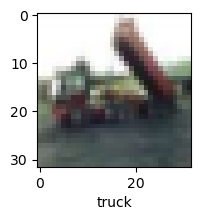

In [55]:
plot_sample(X_train, y_train, 2)

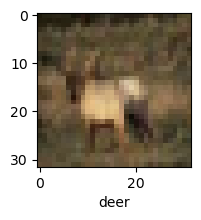

In [56]:
plot_sample(X_train, y_train, 3)

In [58]:
# now we want to normalise our data

# when we have an image we want to divide each pixel value by 255, because the pixal value ranges from 0 - 255
# for each of the channels, R,G,B
# and if we divide them by 255 we will be normalising these R, G and B values from a 0 - 1 range

In [59]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [60]:
X_train[0]/255

# this is the power of a numpy array, it divides every number within the array

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [61]:
X_train = X_train / 255
X_test = X_test / 255

In [62]:
# now we are going to build a simple artificial neural network first, to train the model 
# I want to see the performance of how artificial neural network works AND THEN 
# we can build a convolutional neural network

In [66]:
# building a simple model: 

ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)), # here we are flattening our inputs into a 1 dimensional array 
    layers.Dense(3000, activation = 'relu'), # here we are having the first layer of our NN with 3000 neurons, with RELU activation function which passes positive values and makes negative values 0
    layers.Dense(1000, activation = 'relu'), # second layer with 1000 layers, using relu function 
    layers.Dense(10, activation = 'sigmoid') # output layer has 10 nuerons ie we have 10 categories we are predicting - using sigmoid function - forcing values to 0 or 1
])

ann.compile(optimizer = 'SGD',
           loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy'])

ann.fit(X_train, y_train, epochs = 5)



Epoch 1/5


1563/1563 [==============================] - 47s 29ms/step - loss: 1.8171 - accuracy: 0.3511
Epoch 2/5
1563/1563 [==============================] - 46s 29ms/step - loss: 1.6221 - accuracy: 0.4257
Epoch 3/5
1563/1563 [==============================] - 44s 28ms/step - loss: 1.5427 - accuracy: 0.4555
Epoch 4/5
1563/1563 [==============================] - 44s 28ms/step - loss: 1.4821 - accuracy: 0.4792
Epoch 5/5
1563/1563 [==============================] - 44s 28ms/step - loss: 1.4322 - accuracy: 0.4973


In [67]:
# the compiler is foing the following: 
# SGD = SGD (Stochastic Gradient Descent): An optimization algorithm that updates model weights iteratively based on 
# the gradient of the loss function with respect to the parameters, aiming to minimize the loss and improve model performance.


# SCC = Sparse Categorical Crossentropy: A loss function used for single-label classification tasks, measuring 
# the difference between predicted and actual class indices; suitable when the target is represented 
# as integers instead of one-hot encoded vectors.

# you can also have Categorical Crossentopy - but because our model output is prediciting multiple variables:
# ie 8 is a ship, we need Sparse Categorical Crossentropy

# epochs is just going through the whole dataset 5 times, the model is learning each time, with the above parameters

# a good example: 

# For instance, in a single-label classification task where you're predicting a category among several (e.g., cat, dog, bird), 
# if your actual target for a given example is "dog" (represented as the integer 1), and your model predicts the class 
# probabilities as [0.2, 0.6, 0.2] for cat, dog, and bird respectively, the Sparse Categorical Crossentropy loss would 
# evaluate the discrepancy between the predicted probabilities and the actual target (dog). The goal during training is to 
# minimize this loss, refining the model's ability to correctly classify inputs.

In [68]:
# looking back at the model

# our accuracy scores are quite bad for our training samples... 

In [69]:
# and when we evaluate on the test samples... 

In [70]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.5109 - accuracy: 0.4541


[1.5108941793441772, 0.45410001277923584]

In [71]:
# our accuracy is 45%

# soooo our artificial neural network is performing badly... 

In [74]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('Classification Report: \n', classification_report(y_test, y_pred_classes))

313/313 [==============================] - 2s 5ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.41      0.50      1000
           1       0.44      0.77      0.56      1000
           2       0.40      0.25      0.31      1000
           3       0.45      0.14      0.21      1000
           4       0.37      0.48      0.42      1000
           5       0.45      0.30      0.36      1000
           6       0.39      0.74      0.51      1000
           7       0.69      0.38      0.49      1000
           8       0.44      0.79      0.56      1000
           9       0.64      0.27      0.37      1000

    accuracy                           0.45     10000
   macro avg       0.49      0.45      0.43     10000
weighted avg       0.49      0.45      0.43     10000



In [75]:
# this is showing the precision, recall and f1-score of each of the labels

# Precision: Proportion of correctly predicted positive instances among all instances predicted as positive. 
# High precision indicates low false positives. focuses on TP + FP

# Recall (Sensitivity): Proportion of correctly predicted positive instances among all actual positive instances. 
# High recall indicates low false negatives. focuses on TP + FN 

# F1 Score: Harmonic mean of precision and recall, providing a balanced measure. Useful when there is an uneven 
# class distribution.

In [76]:
# now we are going to use a CNN to improve these scores

In [77]:
# in a CNN we are adding come convelution and pooling layers

In [78]:
# Convolutional Layers:

# Operation: Convolutional layers apply convolution operations to input data using learnable filters (kernels).

# Purpose: These filters slide over the input data, capturing local patterns and features. The convolution operation helps the
# network recognize edges, textures, and more complex structures.

# Benefits: Enables the network to learn hierarchical representations by progressively capturing features of increasing 
# complexity. Reduces the number of parameters compared to fully connected layers.


# Pooling Layers:

# Operation: Pooling layers downsample the spatial dimensions of the input data, reducing its resolution.

# Purpose: The most common pooling operation is max pooling, which retains the maximum value within each local region. 
# This reduces the spatial dimensions while preserving the most salient features.

# Benefits: Pooling helps make the representation of features more robust to small translations and variations, 
# reducing computational complexity and preventing overfitting. It also introduces a form of translation invariance, 
# making the network less sensitive to the exact spatial location of features.

In [79]:
# a quick example: 

# example using a grayscale image of a face.

# Convolutional Layer Example:

# Input: Grayscale image with pixel values.
# Operation: Convolutional layer applies filters to capture features like edges or textures.
# Example Filter: A filter might focus on detecting horizontal edges.
# Output Feature Map: The result is a feature map highlighting regions with horizontal edges.
# Pooling Layer Example (Max Pooling):

# Input: Feature map from the convolutional layer.
# Operation: Max pooling downsamples the spatial dimensions by retaining the maximum value in local regions.
# Example Region: In a 2x2 pooling window, the maximum value is selected.
# Output: The result is a downsampled feature map with reduced spatial resolution, emphasizing the most important features.

# In practice, multiple convolutional and pooling layers are stacked to capture hierarchical features and reduce spatial 
# dimensions, enabling the CNN to recognize complex patterns in images, such as facial features.

In [98]:
cnn = models.Sequential([
    # cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation = 'relu', input_shape=(32,32,3)), # this is our conolutional layer - we are adding 32 filters for our model to look for (random number), kernel size is just the size of our 'searching box'
    layers.MaxPooling2D((2,2)), # max pooling is a popular method (looks for more salient features, average pooling is popular too (looks for smoother features)
    
    # for fun going to add another convolution and pooling layer - this knowleasge etc comes with trail and error
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    # dense
    layers.Flatten(), # we dont need to specify the shape, because the model figures this out automatically 
    layers.Dense(64, activation = 'relu'), # going to keep the number of neurons simple, because the CNN does most of the work
    layers.Dense(10, activation = 'softmax') 
])

In [92]:
# Difference between Sigmoid and Softmax

# Sigmoid Activation:

# Used in binary classification tasks.
# Outputs a value between 0 and 1, representing the probability of the example belonging to the positive class.
# Suitable for independent, binary decisions.


# Softmax Activation:

# Used in multi-class classification tasks.
# Outputs a probability distribution across multiple classes.
# Useful when there are more than two classes, ensuring probabilities sum to 1, aiding in mutually exclusive predictions.

In [89]:
# sigmoid has the following probabilities as an output: 

# 1: 0.45 
# 2: 0.67

# softmax does does the following: 

# 1: (0.45) / (0.45 + 0.67)
# 2: (0.67) / (0.45 + 0.67)

# this is normalising it from a range between 0 and 1 

In [90]:
(0.45) / (0.45 + 0.67)

0.40178571428571425

In [ ]:
(0.67) / (0.45 + 0.67)

In [91]:
# ie if we add these two outputs, our total sum is 1

# this is what softmax does

# sigmoid we don't neccasarily get 1's as outputs all the time

In [99]:
cnn.compile(optimizer = 'adam',  # there are many optimizers to use - adam gives good accuracy
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [88]:
# difference between SGD and Adam optimzers, within image classification:

# Learning Rate:

# SGD: Uses a fixed learning rate, which might need manual tuning for optimal performance. It can be sensitive to 
# the choice of the learning rate.
# Adam: Adapts the learning rates for each parameter during training, providing a dynamic and adaptive approach.
# This can be beneficial in scenarios where different parameters may require different update rates.

# Momentum:

# SGD: Can incorporate momentum to accelerate convergence and navigate through shallow local minima.
# Adam: Combines elements of momentum with adaptive learning rates, typically eliminating the need for an 
# explicit momentum term.

# Adaptability:

# SGD: Requires careful tuning of the learning rate and momentum for optimal convergence.
# Adam: Often requires less hyperparameter tuning and can be more forgiving with a wider range of learning rates.

# Memory Usage:

# SGD: Generally uses less memory compared to Adam.
# Adam: Maintains additional moving averages, requiring more memory, which can be a consideration for
# resource-constrained environments.

# Convergence Speed:

# SGD: May take longer to converge due to a fixed learning rate, especially if not tuned properly.
# Adam: Can converge faster in many cases, benefiting from adaptive learning rates.

In [100]:
cnn.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4673 - accuracy: 0.4716
Epoch 2/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.0895 - accuracy: 0.6211
Epoch 3/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.9559 - accuracy: 0.6674
Epoch 4/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.8660 - accuracy: 0.6989
Epoch 5/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.8018 - accuracy: 0.7228
Epoch 6/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7456 - accuracy: 0.7405
Epoch 7/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.6968 - accuracy: 0.7564
Epoch 8/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.6448 - accuracy: 0.7755
Epoch 9/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5992 - accuracy: 0.7912
Epoch 10/10
1563/1563 [==============================] - 11s 7ms/step - l

In [101]:
# if we compare the ANN to the CNN we see that after epochs, accuracy was 0.49 compared to CNN epochs 5 which is 0.72

In [103]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9623 - accuracy: 0.6975


[0.9622951149940491, 0.6974999904632568]

In [104]:
# 70 percent is pretty good! 

In [106]:
# if we look at the dataset, it is actually quite a tough dataset

In [107]:
# just going to have a little investigate:

In [112]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [113]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

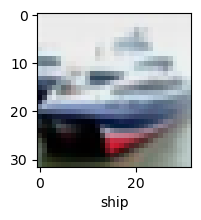

In [114]:
plot_sample(X_test, y_test, 1)

In [115]:
# so lets use our model to try and predict this and see how it performs

In [116]:
# lets predict all of our X_test with our model

In [118]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 3ms/step


array([[1.1190872e-03, 4.4100362e-04, 1.2742281e-05, 3.4808338e-01,
        2.4097584e-05, 2.9552467e-02, 3.0036184e-03, 1.5720363e-05,
        6.1762047e-01, 1.2728415e-04],
       [7.9652108e-03, 3.0072222e-02, 3.0188186e-08, 5.0724726e-08,
        6.1039849e-09, 6.1123123e-10, 5.2660532e-08, 4.7302731e-09,
        9.6128696e-01, 6.7547482e-04],
       [1.8602748e-01, 1.4390497e-01, 1.2584037e-02, 7.8547522e-03,
        2.8899226e-03, 1.8184267e-03, 2.1938498e-03, 4.2845504e-03,
        6.3579035e-01, 2.6515389e-03],
       [8.9185023e-01, 2.9528590e-02, 1.5761649e-03, 1.3776041e-04,
        2.1784010e-04, 1.2746392e-04, 4.6920883e-05, 1.2267811e-05,
        7.6475501e-02, 2.7248705e-05],
       [4.8722438e-07, 9.0077365e-06, 6.6315527e-03, 2.0254573e-02,
        3.6753878e-01, 1.3656066e-04, 6.0542691e-01, 4.4108415e-07,
        1.3774174e-06, 3.1870692e-07]], dtype=float32)

In [120]:
# this is showing all of the probabilities for all of our labels

# so we need to introduce the classes

In [121]:
# argmax is just getting the index of the argument with the highest value

# ie telling us what the class is with the highest probability

y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[8, 8, 8, 0, 6]

In [122]:
# now comparing to our test values

In [123]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [124]:
# our model got the first wrong, but 2nd, 3rd and 4th right

In [125]:
# lets look at the element our model got wrong: 

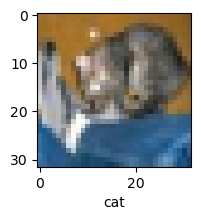

In [126]:
plot_sample(X_test, y_test, 0)

In [130]:
classes[y_classes[0]]

# our model throught the cat was a ship 

# even with human eyes though this is difficult!! 

'ship'

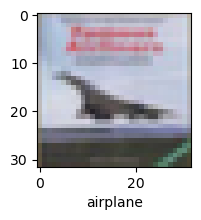

In [131]:
plot_sample(X_test, y_test, 3)

In [133]:
classes[y_classes[3]]

# our model guessed right! 

'airplane'

In [138]:
print('Classification Report: \n', classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.82      0.74      1000
           1       0.75      0.87      0.81      1000
           2       0.61      0.55      0.58      1000
           3       0.55      0.49      0.52      1000
           4       0.60      0.70      0.64      1000
           5       0.74      0.45      0.56      1000
           6       0.77      0.76      0.76      1000
           7       0.71      0.77      0.74      1000
           8       0.76      0.85      0.80      1000
           9       0.82      0.72      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000

